# Predict heart disease rate by county in the US: Regression

## Creating the Model

The goal is to predict the rate of heart disease (per 100,000 individuals) across the United States at the county-level from other socioeconomic indicators. Data was scraped from the USDA ERS website.

The target column is labeled `heart_disease_mortality_per_100k` which is in the 'Training_labels.csv' file.

For more reference, you can access the original kaggle dataset here: [Microsoft Data Science Capstone](https://www.kaggle.com/nandvard/microsoft-data-science-capstone).

---

### Import neccessary modules and review the initial data

In [2]:
# Import neccessary packages for data wrangling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

# show all columns
pd.set_option('display.max_column', None)

# set style for seaborn plots
sns.set_style('whitegrid')

In [3]:
# establish helper functions

# function to print text in bold
def print_bold(_str):
    print("\033[1m" + _str + "\033[0m")

---

# Create Model

We will create two models, one for each saved dataframe from previous data wrangling steps.

### First we will create base models with both data frames to determine which data we will use for the final model
Base models are considered models that are created without tuning any hyperparameters

In [66]:
# import the csv files that will be used for our dataframes
df = pd.read_csv('../Data/predict heart disease rate/df_output.csv', index_col=0)
dfno = pd.read_csv('../Data/predict heart disease rate/dfno_output.csv', index_col=0)

In [68]:
# print shape of both dataframes
print(df.shape)
print(dfno.shape)

(3163, 38)
(2885, 38)


In [69]:
# import estimators/algorithms to be tested for our models
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from xgboost import XGBRegressor

# import modules for metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

# import modules for cross validation
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, KFold, ShuffleSplit
from sklearn.model_selection import ParameterGrid, GridSearchCV, RandomizedSearchCV

#### Perform base model analysis on `df`

In [75]:
# Create the X and y variables for splitting the data
X = df.drop(['heart_disease_mortality_per_100k'], axis=1)
y = df.heart_disease_mortality_per_100k

# scale the data using StandardScaler()
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1)

### Create a script to run the base models for all regressors chosen



STEP1: Build base models and cross validate ...

Model NO. 1 
CV Method: KFold 
Regressor: LinearRegression
Model fit_time: 0.003670954704284668
Model score_time: 0.0009423494338989258
Model test_score: 0.6813547619981392

Model NO. 2 
CV Method: KFold 
Regressor: LinearSVR
Model fit_time: 0.008324050903320312
Model score_time: 0.0009422779083251953
Model test_score: 0.6633895706786134

Model NO. 3 
CV Method: KFold 
Regressor: SVR
Model fit_time: 0.36504971981048584
Model score_time: 0.028221988677978517
Model test_score: 0.5367437366227004

Model NO. 4 
CV Method: KFold 
Regressor: RandomForestRegressor
Model fit_time: 0.8283692121505737
Model score_time: 0.003918099403381348
Model test_score: 0.7184746125793321

Model NO. 5 
CV Method: KFold 
Regressor: GradientBoostingRegressor
Model fit_time: 0.4360828876495361
Model score_time: 0.0015872001647949218
Model test_score: 0.7133188181126349

Model NO. 6 
CV Method: KFold 
Regressor: XGBRegressor
Model fit_time: 1.143972396850586
Mod

,CV Method,Score Avg,Score Std,Fit time,Score time
XGBRegressor - cvm_KF,KFold,0.743193,0.016181,1.143972,0.003075
XGBRegressor - cvm_SS,ShuffleSplit,0.735579,0.018420,1.021610,0.004315
RandomForestRegressor - cvm_KF,KFold,0.718475,0.019475,0.828369,0.003918
RandomForestRegressor - cvm_SS,ShuffleSplit,0.715390,0.014696,0.721431,0.004365
GradientBoostingRegressor - cvm_KF,KFold,0.713319,0.024370,0.436083,0.001587
GradientBoostingRegressor - cvm_SS,ShuffleSplit,0.710548,0.014403,0.383457,0.001984
LinearRegression - cvm_SS,ShuffleSplit,0.686204,0.017981,0.003571,0.000794
LinearRegression - cvm_KF,KFold,0.681355,0.017162,0.003671,0.000942
LinearSVR - cvm_KF,KFold,0.663390,0.018596,0.008324,0.000942
LinearSVR - cvm_SS,ShuffleSplit,0.655071,0.022528,0.008035,0.000843


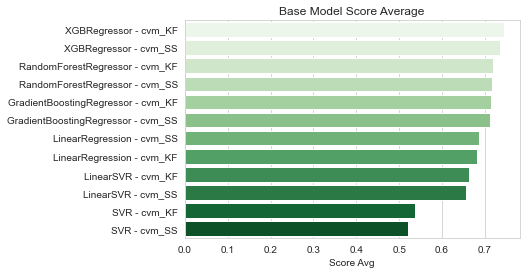

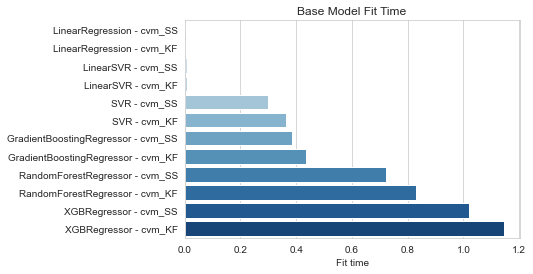

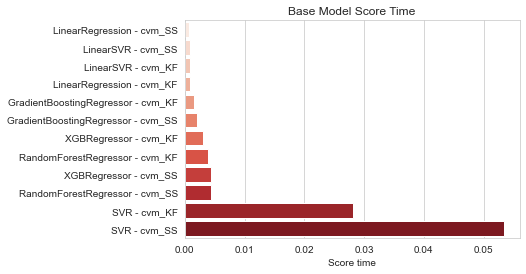

End of base model analysis.


In [76]:
def _regressors():
    
    global regressors
    
    # set random state
    rs = 1
    
    # Create a list of regressors to be tested
    regressors = []
    
    # assign which regressors/algorithms are going to be tested
    regressors.append(LinearRegression())
    regressors.append(LinearSVR(random_state=rs))
    regressors.append(SVR())
    regressors.append(RandomForestRegressor(n_estimators=25, random_state=rs))
    regressors.append(GradientBoostingRegressor())
    regressors.append(XGBRegressor())
    
def _cv_methods():
    
    global cv_list
    
    # create list with cross validation methods
    cv_list = []
    
    # assign cross validation methods for use in analysis
    cv_list.append(KFold(n_splits=10))
    cv_list.append(ShuffleSplit(n_splits=10, test_size=0.2))

def _base_model_eval():
    
    print_bold('\n\nSTEP1: Build base models and cross validate ...')
    
    global cv_results
    global models_tbl
    global cv_method_tbl
    
    cv_results = []
    models_tbl = []
    cv_method_tbl = []
    
    # set variable for model count
    i = 1
    
    for cv_method in cv_list:
        for rgs in regressors:
            
            # perform cross validation
            scores = cross_validate(rgs, X=X_train, y=y_train, cv=cv_method, n_jobs=-1)
            
            # assign variable for naming regressors
            rgs_ = str(rgs).split('(')[0]
            
            print('\nModel NO. %s \nCV Method: %s \nRegressor: %s' % (i, str(cv_method).split('(')[0], rgs_))
            for key in scores.keys():
                print('Model %s: %s' % (key, scores[key].mean()))

            models_tbl.append(rgs_+' - cvm_'+''.join([c for c in str(str(cv_method).split('(')[0]) if c.isupper()]))
            cv_method_tbl.append(str(cv_method).split('(')[0])
            cv_results.append(scores)
                    
            # next model
            i+=1 

def _model_results():
    
    print_bold('\n\n\nSTEP2: Model analysis...\n\n')
    
    global fit_time
    global score_time
    global test_score
    global result_tbl
    
    fit_time = []
    score_time = []
    test_score = []
    
    for n, item in enumerate(cv_results):
        for key in item:

            if key == 'fit_time':
                fit_time.append(item[key].mean())
            elif key == 'score_time':
                score_time.append(item[key].mean())
            else:
                test_score.append([np.mean(item[key]), np.std(item[key])])
                
    result_tbl = pd.DataFrame(data={'CV Method':cv_method_tbl, 'Score Avg':[row[0] for row in test_score],
                                    'Score Std':[row[1] for row in test_score], 'Fit time':fit_time, 'Score time':score_time},
                              index=models_tbl)
    
    print('Table is sorted by `Score Avg` ---------------------------------------------')
    display(result_tbl.sort_values(by='Score Avg', ascending=False))
    print('\n\n')
    
    sns.set_style('whitegrid')
    sns.barplot(x='Score Avg', y=result_tbl.sort_values(by='Score Avg', ascending=False).index,
                data=result_tbl.sort_values(by='Score Avg', ascending=False), palette='Greens')    
    plt.title('Base Model Score Average')
    plt.show()
    sns.barplot(x='Fit time', y=result_tbl.sort_values(by='Fit time').index, data=result_tbl.sort_values(by='Fit time'),
               palette='Blues')
    plt.title('Base Model Fit Time')
    plt.show()
    sns.barplot(x='Score time', y=result_tbl.sort_values(by='Score time').index, data=result_tbl.sort_values(by='Score time'),
               palette='Reds')
    plt.title('Base Model Score Time')
    plt.show()
    
def main():
    _regressors()
    _cv_methods()
    _base_model_eval()
    _model_results()

if __name__ == "__main__":
    main()
    print('End of base model analysis.')

#### Perform base model analysis on `dfno`

In [77]:
# Create the X and y variables for splitting the data
X = dfno.drop(['heart_disease_mortality_per_100k'], axis=1)
y = dfno.heart_disease_mortality_per_100k

# scale the data using StandardScaler()
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1)



STEP1: Build base models and cross validate ...

Model NO. 1 
CV Method: KFold 
Regressor: LinearRegression
Model fit_time: 0.003480362892150879
Model score_time: 0.0009859323501586914
Model test_score: 0.6787176465092267

Model NO. 2 
CV Method: KFold 
Regressor: LinearSVR
Model fit_time: 0.009425735473632813
Model score_time: 0.0010432958602905273
Model test_score: 0.6613823000077406

Model NO. 3 
CV Method: KFold 
Regressor: SVR
Model fit_time: 0.31099059581756594
Model score_time: 0.023708677291870116
Model test_score: 0.5246832018611334

Model NO. 4 
CV Method: KFold 
Regressor: RandomForestRegressor
Model fit_time: 0.7763875484466553
Model score_time: 0.003670668601989746
Model test_score: 0.7118837592851166

Model NO. 5 
CV Method: KFold 
Regressor: GradientBoostingRegressor
Model fit_time: 0.4721412420272827
Model score_time: 0.0015376091003417968
Model test_score: 0.6991240945739235

Model NO. 6 
CV Method: KFold 
Regressor: XGBRegressor
Model fit_time: 1.0808324098587037
Mo

,CV Method,Score Avg,Score Std,Fit time,Score time
XGBRegressor - cvm_KF,KFold,0.729242,0.028685,1.080832,0.003026
XGBRegressor - cvm_SS,ShuffleSplit,0.714141,0.025064,1.008763,0.004514
RandomForestRegressor - cvm_KF,KFold,0.711884,0.022087,0.776388,0.003671
RandomForestRegressor - cvm_SS,ShuffleSplit,0.703381,0.018874,0.646932,0.004519
GradientBoostingRegressor - cvm_KF,KFold,0.699124,0.020760,0.472141,0.001538
GradientBoostingRegressor - cvm_SS,ShuffleSplit,0.699094,0.020255,0.368081,0.001885
LinearRegression - cvm_SS,ShuffleSplit,0.683519,0.018090,0.003571,0.000992
LinearRegression - cvm_KF,KFold,0.678718,0.026161,0.003480,0.000986
LinearSVR - cvm_SS,ShuffleSplit,0.661650,0.011544,0.007837,0.001041
LinearSVR - cvm_KF,KFold,0.661382,0.029360,0.009426,0.001043


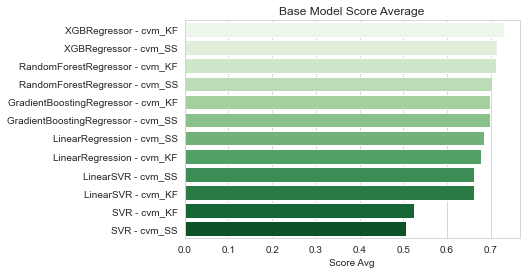

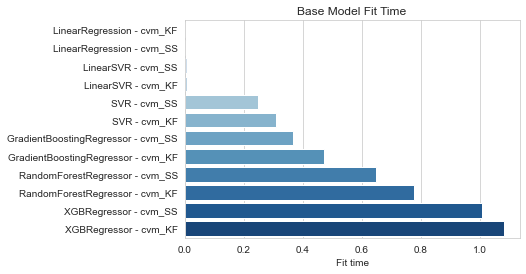

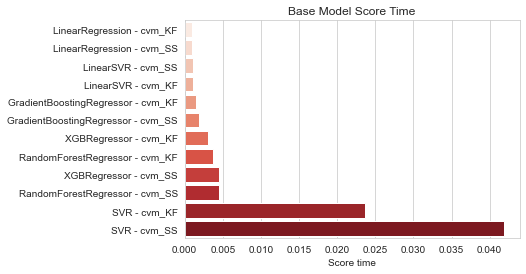

In [78]:
# run the main script from above 'main()' with the new dataframe 'dfno'
main()

## Base Model Evaluation and Next Steps

#### General observations:
It looks like `df` outperforms dataframe `dfno` with all models. **We will move forward using dataframe `df`.**

Looking at this dataframe a bit more, score time can be considered negligable. For the cross validation methods, it seems that KFold produces more accurate models, but ShuffleSplit is faster. Based on these results, since the trade off is minimal in both diretions, we will proceed with `KFold` cross validation method only.

Alongside these observations, it can be seen that the `XGBRegressor` is our most accurate regressor, yet slowest (as expected). The fastest performing model is built with the `LinearRegression` regressor, with an average-of-the-pack score. The worst performing regressor was the Support Vector Regression (`SVR`) method.

#### Next steps:
We will create models with different ensambled algorithms to see which regressors we want to tune. The algorithms that we will ensamble are as followed:

`XGBRegressor` `GradientBoostingRegressor` `RandomForestRegressor` `LinearRegression`

Each of these will be paired with the `AdaBoostRegressor` and `BaggingRegressor`.

In [ ]:
# Create the X and y variables for splitting the data
X = df.drop(['heart_disease_mortality_per_100k'], axis=1)
y = df.heart_disease_mortality_per_100k

# scale the data using StandardScaler()
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1)



STEP1: Build ensamble models and cross validate ...

Model NO. 1 
Regressor: GradientBoostingRegressor
Model fit_time: 0.40304906368255616
Model score_time: 0.0019344806671142579
Model test_score: 0.6991541158866709

Model NO. 2 
Regressor: XGBRegressor
Model fit_time: 1.0943758010864257
Model score_time: 0.002973127365112305
Model test_score: 0.7292417511865404

Model NO. 3 
Regressor: AdaBoostRegressor with RandomForestRegressor
Model fit_time: 12.524481892585754
Model score_time: 0.06026415824890137
Model test_score: 0.7560385108190225

Model NO. 4 
Regressor: AdaBoostRegressor with LinearRegression
Model fit_time: 0.05485599040985108
Model score_time: 0.0016866445541381836
Model test_score: 0.6677658776842733

Model NO. 5 
Regressor: AdaBoostRegressor with XGBRegressor
Model fit_time: 49.25849792957306
Model score_time: 0.07340810298919678
Model test_score: 0.7777191067644891

Model NO. 6 
Regressor: AdaBoostRegressor with GradientBoostingRegressor
Model fit_time: 18.185025715827

,CV Method,Score Avg,Score Std,Fit time,Score time
AdaBoostRegressor with XGBRegressor,KFold,0.777719,0.015811,49.258498,0.073408
AdaBoostRegressor with RandomForestRegressor,KFold,0.756039,0.017975,12.524482,0.060264
BaggingRegressor with XGBRegressor,KFold,0.751205,0.018890,10.276116,0.016467
AdaBoostRegressor with GradientBoostingRegressor,KFold,0.729368,0.017612,18.185026,0.026387
XGBRegressor,KFold,0.729242,0.028685,1.094376,0.002973
BaggingRegressor with RandomForestRegressor,KFold,0.702818,0.021533,1.727119,0.011111
BaggingRegressor with GradientBoostingRegressor,KFold,0.701822,0.019771,3.544115,0.006101
GradientBoostingRegressor,KFold,0.699154,0.020787,0.403049,0.001934
BaggingRegressor with LinearRegression,KFold,0.679150,0.025826,0.063736,0.002133
AdaBoostRegressor with LinearRegression,KFold,0.667766,0.026987,0.054856,0.001687


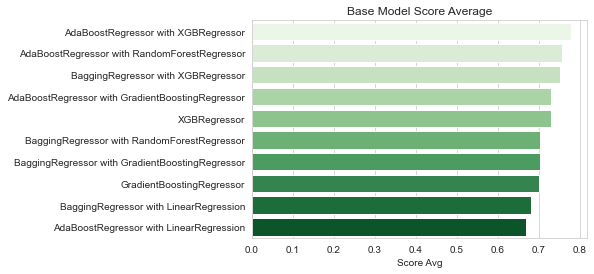

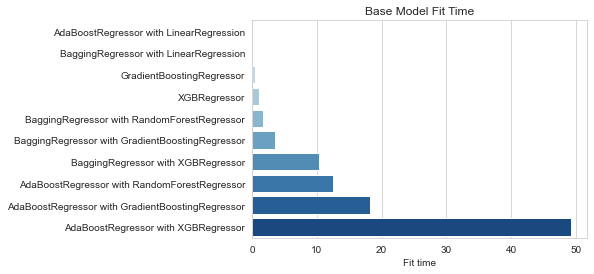

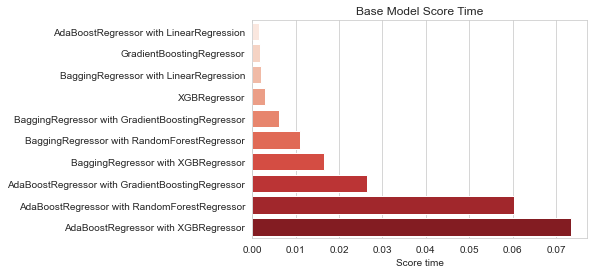

END OF ENSAMBLE MODEL ANALYSIS.


In [81]:
def _regressors():
    
    global regressors
    
    # Create a list of regressors to be tested
    regressors = []
    
    # assign which algorithms are going to be tested
    regressors.append(GradientBoostingRegressor())
    regressors.append(XGBRegressor())
    
    # Boosting
    regressors.append(AdaBoostRegressor(RandomForestRegressor(n_estimators=10)))
    regressors.append(AdaBoostRegressor(LinearRegression()))
    regressors.append(AdaBoostRegressor(XGBRegressor()))
    regressors.append(AdaBoostRegressor(GradientBoostingRegressor()))
                       
    # Bagging
    regressors.append(BaggingRegressor(RandomForestRegressor(n_estimators=10)))
    regressors.append(BaggingRegressor(LinearRegression()))
    regressors.append(BaggingRegressor(XGBRegressor()))
    regressors.append(BaggingRegressor(GradientBoostingRegressor()))

def _ensamble_model_eval():
    
    print('\n\nSTEP1: Build ensamble models and cross validate ...')
    
    global cv_results
    global models_tbl
    global cv_method_tbl
    
    cv_results = []
    models_tbl = []
    cv_method_tbl = []
    
    # set variable for model count
    i = 1
    
    # assign cross validation method
    kf = KFold(n_splits=10)
    
    for rgs in regressors:

        # perform cross validation
        scores = cross_validate(rgs, X=X_train, y=y_train, cv=kf, n_jobs=-1)

        # assign variable for naming regressors
        rgs_ = str(rgs).split('(')[0]

        # assigning variable to be checked for ensambled methods
        ens_rgs = str(rgs)
        rgs_lower = ens_rgs.lower()

        # Checking whether there is a base_estimator inside an ensambled regressor
        if 'base_estimator' in rgs_lower:

            rgs_ = '%s with %s' % (rgs_, str(rgs).split('(')[1].split('=')[1])
            print('\nModel NO. %s \nRegressor: %s' % (i,rgs_))

            for key in scores.keys():
                print('Model %s: %s' % (key, scores[key].mean()))

            models_tbl.append(rgs_)
            cv_method_tbl.append(str(kf).split('(')[0])
            cv_results.append(scores)

        else:
            print('\nModel NO. %s \nRegressor: %s' % (i, rgs_))
            for key in scores.keys():
                print('Model %s: %s' % (key, scores[key].mean()))

            models_tbl.append(rgs_)
            cv_method_tbl.append(str(kf).split('(')[0])
            cv_results.append(scores)

        # next model
        i+=1 
    
def main():
    _regressors()
    _ensamble_model_eval()
    _model_results()

if __name__ == "__main__":
    main()
    print('END OF ENSAMBLE MODEL ANALYSIS.')

### Ensamble Model Evaluation and Next Steps
#### General observations:
The `AdaBoostRegressor with XGBRegressor` performed the best, but at a heavy cost of time to fit the model. The next two highest scored models were `AdaBoostRegressor with RFR` and `BaggingRegressor with XGBRegressor`, with model fit times of roughly 14s and 11s, respectively.

Both `XGBRegressor` and `GradientBoostingRegressor` are still good models that are very efficient in comparison to the above mentioned ensamble models.

#### Next steps:
Next we will perform hyper parameter tuning for the following models:

`XGBRegressor`, `GradientBoostingRegressor`, `BaggingRegressor with XGBRegressor`, and `AdaBoostRegressor with RFR`

## The following script includes 2 methods for evaluating best parameters, GridSearchCV and RandomSearchCV.
After multiple iterations, it was determined that RandomSearchCV can only be used due to times sake. Therefore, the user input for the script must be 2.

#### Due to computational limits, the original parameters needed to be adjusted.
The old parameters are denoted after the double hash `##` after the specified parameter.

In [82]:
# Due to the FutureWarning: "FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22."
# It will be disabled to limit distraction from results

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The following script caused hundreds of FutureWarning warnings to pop up, which is why they are being disabled.

In [83]:
# import time module for time stamping start times
import time

def _param_grids():
    
    global model_params
    
    # create an empty dictionary that will store the parameter grids for each model
    model_params = dict()
    
    # parameters for XGBRegressor
    xgb_n_est = [int(x) for x in np.linspace(100, 1000, 5)]     ## Previously step size was 10
    xgb_learn_rate = [0.001, 0.01, 0.1, 1]                      ## [0.001, 0.01, 0.1, 0.3, 0.5, 1]
    min_child_weight = [0.001, 0.01, 0.1, 0.5]                  ## [0.001, 0.01, 0.1, 0.25, 0.5, 0.75]
    xgb_max_dpt = np.arange(2, 10, 4)
    gamma = [0, 1, 5, 10]                                       ## [0, 0.5, 1, 3, 5, 10]
    xgb_subsample = [0.1, 0.5, 0.9]                             ## [0.1, 0.3, 0.5, 0.7, 0.9, 1]
    colsamp_bytree = np.arange(0.1, 1, 0.2)
    # tree_meth = 'gpu_hist' - not working, bringing up error saying that this parameter doesn't accept strings?
    
    xgb_params = {'n_estimators':xgb_n_est, 'learning_rate':xgb_learn_rate, 'max_depth':xgb_max_dpt, 'min_child_weight':min_child_weight,
                  'gamma': gamma,'subsample':xgb_subsample,'colsample_bytree':colsamp_bytree
                 }
    XGBRegressor()
    
    # parameters for GradientBoostingRegressor
    # we will reuse some of the parameters for XGBRegressor
    gbm_loss = ['ls', 'lad', 'quantile']
    min_samp_split = [2, 4, 6, 10]
    min_samp_leaf = [1, 2, 3, 4, 5]
    gbm_max_feats = ['auto','sqrt']
    
    GBR_params = {'loss':gbm_loss, 'n_estimators':xgb_n_est, 'learning_rate':xgb_learn_rate, 'max_depth':xgb_max_dpt,
                  'subsample':xgb_subsample,'min_samples_split':min_samp_split, 'min_samples_leaf':min_samp_leaf,
                  'max_features':gbm_max_feats
                 }
    
    # parameters for AdaBoostRegressor with RandomForestRegressor
    # parameters for RandomForestRegressor
    be_criter = ['mse','mae']                                ## Not being used
    be_n_est = [int(x) for x in np.linspace(100, 1000, 5)]
    be_maxfeats = ['auto']                                   ## 'auto' and 'sqrt' are common inputs
    be_maxdpt = [int(x) for x in np.linspace(10, 100, 5)]    ## be_maxdpt.append(None)
    be_minsampleaf = [1, 3]                                  ## [1, 3, 5]
    be_bs = [True, False]
    
    # parameters for AdaBoostRegressor
    abr_n_est = [10,100,150,1000]                            ## [10,50,100,150,200,500,1000]
    abr_learn_rate = [10, 1.0, 0.1, 0.01, 0.001]             ## [10, 1.0, 0.1, 0.01, 0.001]
    abr_loss = ['linear','square']                           ## ['linear','square','exponential']
    
#     Try running ensambled methods without tuning the hyperparameters of the base estimators
#
#     ABR_RFR = {'base_estimator__n_estimators':be_n_est,'base_estimator__max_features':be_maxfeats,
#                'base_estimator__max_depth':be_maxdpt,'n_estimators':abr_n_est,'learning_rate':abr_learn_rate, 'loss':abr_loss
#               }
    ABR_RFR = {'n_estimators':abr_n_est,'learning_rate':abr_learn_rate, 'loss':abr_loss}
    
    # parameters for BaggingRegressor with XGBRegressor
    bag_n_est = [5, 10, 50, 100, 500]                        ## [5, 10, 20, 50, 100, 200, 500, 1000]    
    max_samps = [0.1, 0.5, 1.0]                              ## Default is float 1.0
    bag_max_feats = [0.1, 0.3, 0.7, 1.0]                     ## Default is float 1.0
    bag_bs = [True, False]
    bag_bs_feats = [True, False]
    n_jobs=-1
    
#     Try running ensambled methods without tuning the hyperparameters of the base estimators
#
#     BR_XGBR = {'base_estimator__learning_rate':xgb_learn_rate, 'base_estimator__n_estimators':xgb_n_est,
#                'base_estimator__min_child_weight':min_child_weight,'n_estimators':bag_n_est,'max_samples':max_samps,
#                'max_features':bag_max_feats, 'bootstrap':bag_bs,'bootstrap_features':bag_bs_feats
#               }

    BR_XGBR = {'n_estimators':bag_n_est,'max_samples':max_samps,'max_features':bag_max_feats, 'bootstrap':bag_bs,
               'bootstrap_features':bag_bs_feats
              }
    
    model_params['XGBR'] = xgb_params
    model_params['GBR'] = GBR_params
    model_params['ABR_RFR'] = ABR_RFR
    model_params['BR_XGBR'] = BR_XGBR
    
def _regressors():
    
    global regressors
    global regressor_desc
    
    # Create a list of regressors to be tested
    regressors = []
    
    # assign which regressors/algorithms are going to be tested
    regressors.append(GradientBoostingRegressor())
    regressors.append(XGBRegressor())
    regressors.append(AdaBoostRegressor(RandomForestRegressor()))
    regressors.append(BaggingRegressor(XGBRegressor()))

    regressor_desc = []
    
    for rgs in regressors:

        # assign variable for naming regressors
        rgs_ = str(rgs).split('(')[0]

        # assigning variable to be checked for ensambled methods
        ens_rgs = str(rgs)
        rgs_lower = ens_rgs.lower()

        # Checking whether there is a base_estimator inside an ensambled regressor
        if 'base_estimator' in rgs_lower:
            rgs_ = '%s with %s' % (rgs_, str(rgs).split('(')[1].split('=')[1])
            regressor_desc.append(rgs_)

        else:
            regressor_desc.append(rgs_)
    
def _gridsearchcv():
    
    global model_used
    global best_scores
    global best_params
    global cv_results
    
    print('\n\nSTEP 1: Generate GridSearchCV for all regressors...')
    
    # create lists to save best scores and parameters
    model_used = []
    best_scores = []
    best_params = []
    cv_results = []
    
    for rgs in regressors:
        for grid in model_params.keys():
            
            # assign variable for naming regressors
            rgs_ = str(rgs).split('(')[0]
            
            # comparitive method to grab the correct parameter grid from 'model_params' dict
            mod_abv = ''.join([c for c in [str(x).split('(')[0] for x in str(rgs_)] if c.isupper()])
            
            if mod_abv in grid and mod_abv[0] == grid[0]:
                print(f'\nTraining model: {mod_abv} - grid {grid}')
                gscv = GridSearchCV(rgs, param_grid=model_params[grid], scoring='explained_variance', verbose=5, n_jobs=-1)
                gscv.fit(X_train, y_train)
                print(f'\nBest score: {gscv.best_score_}')
                print(f'Best parameters: {gscv.best_params_}')
                model_used.append(grid)
                best_scores.append(gscv.best_score_)
                best_params.append(gscv.best_params_)
                cv_results.append(gscv.cv_results_)

def _randomizedsearchcv():
    
    # create global variables
    global model_used
    global best_scores
    global best_params
    global cv_results
    global rand_search_dict
    global model_results
    
    print('\n\nSTEP 1: Generate RandomizedSearchCV for all regressors...')
    
    # create lists to save best scores and parameters
    model_used = []
    best_scores = []
    best_params = []
    cv_results = []
    
    # set parameters for RandomizedSearchCV
    folds = 5
    param_iter = 10
    
    # create a cross validation method
    kf = KFold(n_splits=folds)
    
    for rgs in regressors:
        for grid in model_params.keys():
            
            # assign variable for naming regressors
            rgs_ = str(rgs).split('(')[0]
            
            # comparitive method to grab the correct parameter grid from 'model_params' dict
            mod_abv = ''.join([c for c in [str(x).split('(')[0] for x in str(rgs_)] if c.isupper()])
            
            if mod_abv in grid and mod_abv[0] == grid[0]:
                # print model type which is being tuned
                print_bold(f'\nTraining Model: {grid}')
                
                # set empty dictionary to store all iterations of randomsearchcv of each model
                rand_search_dict = dict()
                
                # iterate 5 times through randomsearchcv for all models and select the best parameters
                for i in range(1,6):
                    # print timestamp
                    print(f'Start time of iteration: {time.asctime()}\n')
                    
                    # train and fit model
                    rscv = RandomizedSearchCV(rgs, param_distributions=model_params[grid], n_iter=param_iter, 
                                              scoring='explained_variance', verbose=5, cv=kf, n_jobs=-1)
                    rscv.fit(X_train, y_train)
                    
                    # store all scoring iterations and draw which score was best
                    rand_search_dict[f'model_it_{i}'] = {'best_score':rscv.best_score_, 'best_params':rscv.best_params_,
                                                        'cv_results':rscv.cv_results_}
                    
                # set a variable bs for initializing best score
                bs = 0
                
                # iterate through all scores in the dictionary and assign best score and parameters
                for it in rand_search_dict.keys():
                    score = rand_search_dict[it]['best_score']
                    if bs < score:
                        bs = score
                        best = it
                print_bold(f'Model Summary: {grid}')
                print_bold('Best score: %s' % (rand_search_dict[best]['best_score']))
                print('Best parameters: %s' % (rand_search_dict[best]['best_params']))
                
                # append results to appropriate tables
                model_used.append(grid)
                best_scores.append(rand_search_dict[best]['best_score'])
                best_params.append(rand_search_dict[best]['best_params'])
                cv_results.append(rand_search_dict[best]['cv_results'])
                model_results[grid] = {'model_score':rand_search_dict[best]['best_score'],
                                       'model_parameters':rand_search_dict[best]['best_params']}
                
def _model_results():
    
    print_bold('\n\n\nSTEP2: Model analysis...\n\n')
    
    global df_result
    
    df_result = pd.DataFrame(data={'Model Description':regressor_desc, 'Model Score':best_scores,
                                   'Mean Fit Time (s)':[model['mean_fit_time'].mean() for model in cv_results],
                                   'Std Fit Time':[model['std_fit_time'].mean() for model in cv_results]},
                            index=model_used)
    
    print('Table is sorted by `Model Score` ---------------------------------------------')
    display(df_result.sort_values(by='Model Score', ascending=False))
    print('\n\n')
                
def main():
    
    _param_grids()
    _regressors()
    
    search_type = input("Select an option and press enter:\n\n'1' for GridSearchCV (likely more accurate, but will take longer!)\n'2' for \
RandomizedSearchCV (much shorter, but potentially less accurate)\nInput: ")
    if search_type == '1':
        _gridsearchcv()
    elif search_type == '2':
        _randomizedsearchcv()
    else:
        print('\nNot a valid input. Please re-run script to execute hyperparameter tuning.')
        
    _model_results()
    
if __name__ == '__main__':
    main()
    print('\nEnd of hyperparameter tuning.')

Select an option and press enter:

'1' for GridSearchCV (likely more accurate, but will take longer!)
'2' for RandomizedSearchCV (much shorter, but potentially less accurate)
Input: 2


STEP 1: Generate RandomizedSearchCV for all regressors...

Training Model: GBR
Start time of iteration: Mon Sep 14 13:09:13 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   12.0s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.2s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:09:31 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    7.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.1s finished


Start time of iteration: Mon Sep 14 13:09:41 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  50 | elapsed:    1.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    2.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    3.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.6s finished


Start time of iteration: Mon Sep 14 13:09:50 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    8.2s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.2s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:10:06 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    8.0s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished


Model Summary: GBR
Best score: 0.7531773713924302
Best parameters: {'subsample': 0.5, 'n_estimators': 775, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 6, 'loss': 'ls', 'learning_rate': 0.01}

Training Model: XGBR
Start time of iteration: Mon Sep 14 13:10:19 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    7.9s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.6s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:10:30 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    9.2s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   10.9s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:10:43 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   10.1s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.3s finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:10:55 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    8.1s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.7s finished


Start time of iteration: Mon Sep 14 13:11:06 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   12.9s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.3s finished


Model Summary: XGBR
Best score: 0.7615318973594645
Best parameters: {'subsample': 0.9, 'n_estimators': 775, 'min_child_weight': 0.01, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 10, 'colsample_bytree': 0.5000000000000001}

Training Model: ABR_RFR
Start time of iteration: Mon Sep 14 13:11:22 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  1.5min remaining:   28.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


Start time of iteration: Mon Sep 14 13:16:14 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   53.3s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.8min finished


Start time of iteration: Mon Sep 14 13:20:18 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  3.2min remaining:   59.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.9min finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Start time of iteration: Mon Sep 14 13:26:33 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  1.9min remaining:   36.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished


Start time of iteration: Mon Sep 14 13:33:45 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  4.5min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.7min finished
C:\Users\samdo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model Summary: ABR_RFR
Best score: 0.7621491288877188
Best parameters: {'n_estimators': 1000, 'loss': 'square', 'learning_rate': 1.0}

Training Model: BR_XGBR
Start time of iteration: Mon Sep 14 13:44:33 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  3.6min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.0min finished


Start time of iteration: Mon Sep 14 13:51:44 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  9.4min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.2min finished


Start time of iteration: Mon Sep 14 14:06:44 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   31.9s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.6min finished


Start time of iteration: Mon Sep 14 14:08:23 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:   32.7s remaining:   10.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   50.6s finished


Start time of iteration: Mon Sep 14 14:09:16 2020

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:  4.4min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.1min finished


Model Summary: BR_XGBR
Best score: 0.7770745360974047
Best parameters: {'n_estimators': 50, 'max_samples': 1.0, 'max_features': 1.0, 'bootstrap_features': True, 'bootstrap': False}



STEP2: Model analysis...


Table is sorted by `Model Score` ---------------------------------------------


,Model Description,Model Score,Mean Fit Time (s),Std Fit Time
BR_XGBR,BaggingRegressor with XGBRegressor,0.777075,74.660406,0.786755
ABR_RFR,AdaBoostRegressor with RandomForestRegressor,0.762149,49.474793,1.124591
XGBR,XGBRegressor,0.761532,3.279330,0.118036
GBR,GradientBoostingRegressor,0.753177,2.304990,0.084161







End of hyperparameter tuning.


---
## Model Summary

**Reviewing the modeling process -**

Initially, there were two sets of data that were tested for base model evaluation; `df` and `dfno` (where dfno had the top 10% of outliers removed). Since the base models created with `df` outperformed all the models using `dfno`, it was decided to proceed using `df`.

Next, the top base models (`XGBRegressor` `GradientBoostingRegressor` `RandomForestRegressor` `LinearRegression`) were evaluated by creating ensambled algorithms with `AdaBoostRegressor` and `BaggingRegressor` and a simple cross validation was performed. This resulted in 4 models that were selected to have their hyperparameters tuned: `XGBRegressor`, `GradientBoostingRegressor`, `BaggingRegressor with XGBRegressor`, and `AdaBoostRegressor with RFR`.

## Model Selection - XGBRegressor

In conclusion, the model that I am selecting as best is `XGBRegressor`. This model was roughly 20 times faster than either of the ensambled methods with AdaBoosting or Bagging, and had a score comparable to both.

The model best score and parameters chosen are as listed below:

In [88]:
model_results['XGBR']

{'model_score': 0.7615318973594645,
 'model_parameters': {'subsample': 0.9,
  'n_estimators': 775,
  'min_child_weight': 0.01,
  'max_depth': 6,
  'learning_rate': 0.1,
  'gamma': 10,
  'colsample_bytree': 0.5000000000000001}}

# End of notebook.